Complete implementation of K-means algorythm to find clusters in N dimensional data as function.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
def euclid_dist(p1, p2):
    """
    Calculates distance between 2 points in N dimensional space
    """
    summ = 0
    for x, y in zip(p1, p2):
        summ += (x - y)**2
    
    return np.sqrt(summ)

# Algorythm

In [3]:
def k_means(df, n_clusters=8, n_init=10, n_iter=5, distance_function=euclid_dist):
    """
    K-means clustering algorythm

    input:
    df: pandas.DataFrame
    n_clusters: number of guessed clusters
    n_init: number of diffrent starting positions for centroids
    n_iter: number of iterations to calculate much precise mean
    distance_function: distance function
    
    return: coordinates of centroids as dataframe
    """
    # Saving variables for later
    n_datapoints = df.shape[0]
    minn = df.min()
    maxx = df.max()
    best_centroids = (np.inf, None)
    
    # Creating array of distances from points to centroids
    dist_to_centroids = np.empty(shape=(n_datapoints, n_clusters))
    
    # Finding lowest variance
    for _ in range(n_init):
        
        # Inicializing centroids
        my_centroids = np.random.uniform(low=minn, high=maxx, size=(n_clusters, data.shape[1]))
        my_centroids_df = pd.DataFrame(my_centroids)
    
        # Finding optimum centroids
        for _ in range(n_iter):
            
            # Calculating Euclidean distance from points to centroids
            for i in range(n_clusters):
                for j in range(n_datapoints):
                    dist_to_centroids[j][i] = distance_function(df.iloc[j], my_centroids_df.iloc[i])
            dist_df = pd.DataFrame(dist_to_centroids)
            labels = dist_df.idxmin(axis=1)

            # Updating centroids
            my_new_centroids_df = df.groupby(by=labels).mean()
            missing_indexes = list(set(range(n_clusters)) - set(my_new_centroids_df.index))
            missing_rows = my_centroids_df.loc[missing_indexes]
            my_centroids_df = pd.concat([my_new_centroids_df, missing_rows])
            my_centroids_df = my_centroids_df.sort_index()
            
            
        variation = df.groupby(by=labels).var().mean().mean() # lower = better
        
        if variation < best_centroids[0]:
            best_centroids = variation, my_centroids_df
            
    return best_centroids[1]

# Data

In [4]:
from sklearn.datasets import make_blobs

data, _, real_centroids = make_blobs(n_samples=300, n_features=2, centers=6, return_centers=1, cluster_std=2, center_box=(-20,20))

# Converting to dataframe
df = pd.DataFrame(data)

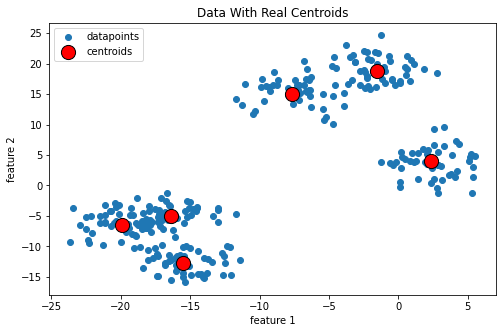

In [5]:
plt.figure(figsize=(8,5))
plt.title("Data With Real Centroids")
plt.scatter(df.iloc[:,0], df.iloc[:,1], label="datapoints")
plt.scatter(real_centroids[:,0], real_centroids[:,1], c="r", s=200, label="centroids", edgecolors="k")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend();

# Testing Algorythm

In [6]:
centroids = k_means(df, n_clusters=6)

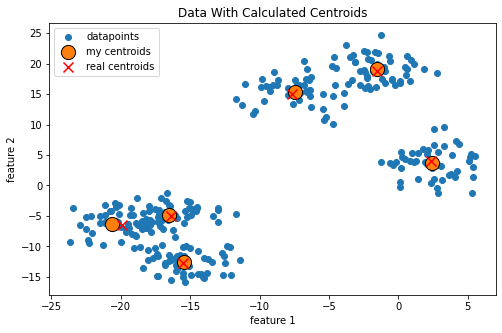

In [7]:
plt.figure(figsize=(8,5))
plt.title("Data With Calculated Centroids")
plt.scatter(df.iloc[:,0], df.iloc[:,1], label="datapoints")
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1], label="my centroids", s=200, edgecolors="k")
plt.scatter(real_centroids[:,0], real_centroids[:,1], c="r", marker="x", s=100, label="real centroids")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend();

Algorythm could be faster if I would implement everythink in numpy.